# Iris Dataset Analysis
Analysis of the classic Iris dataset using pandas, matplotlib, and seaborn.

=== Data Exploration ===

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    

/tmp/ipykernel_68469/2431698947.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby('species').mean()


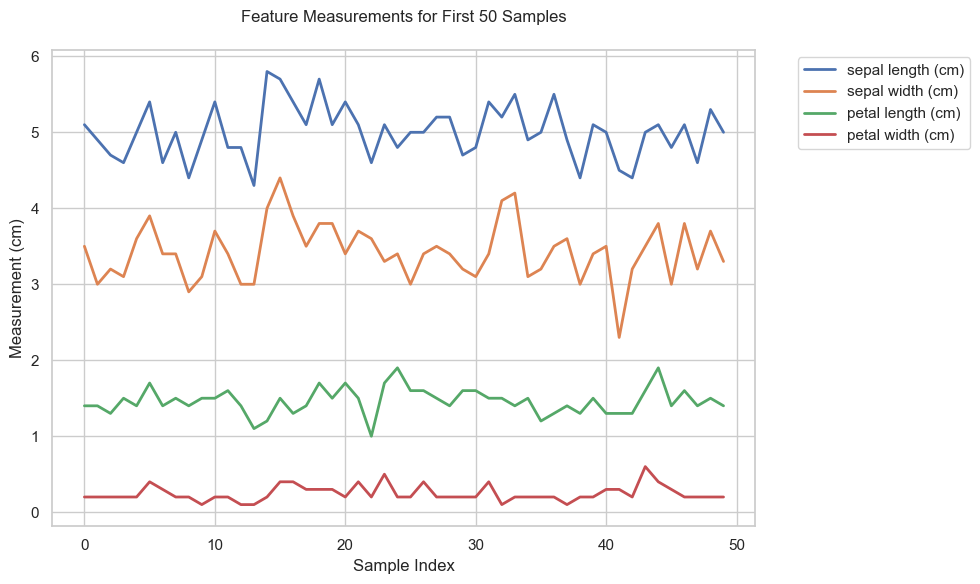

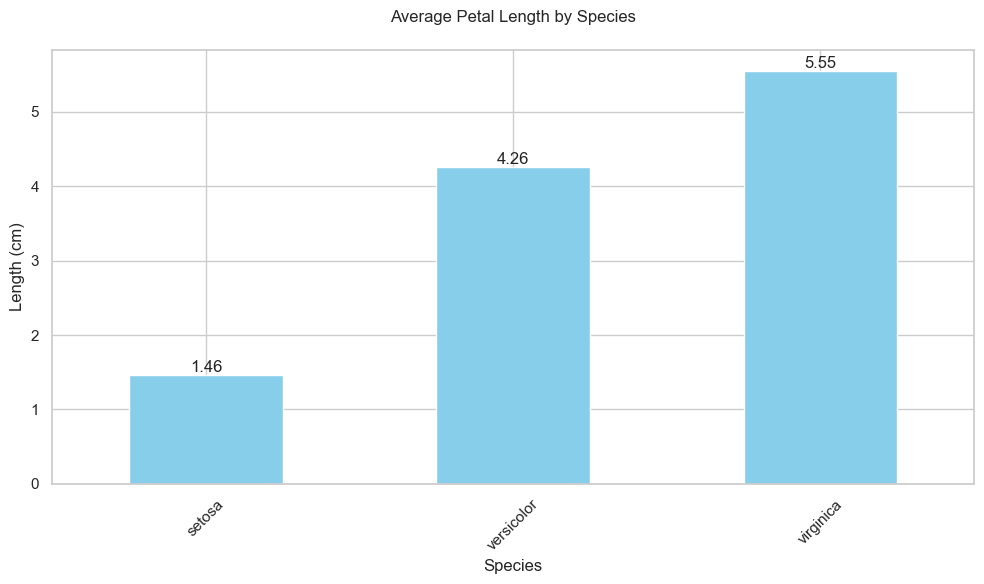

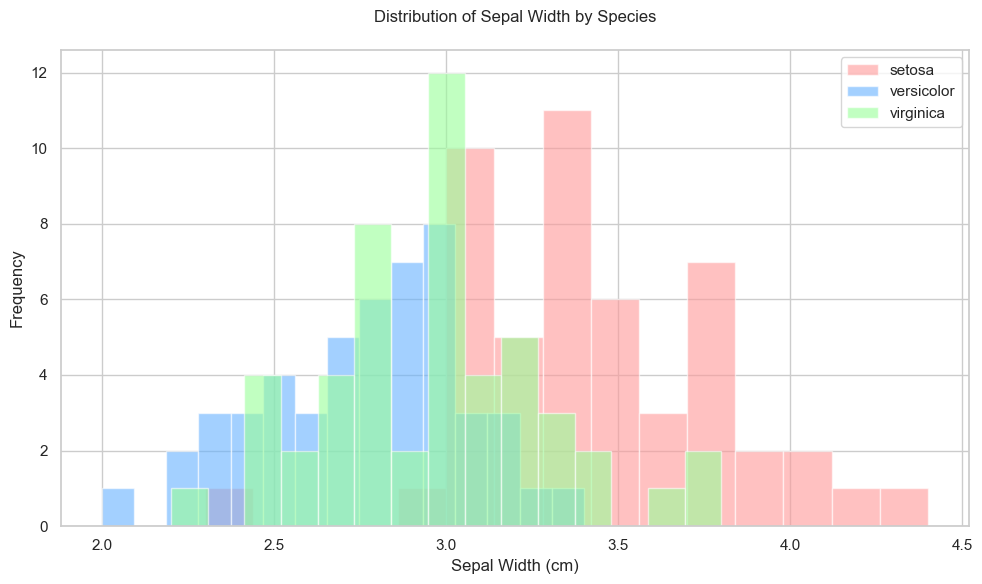

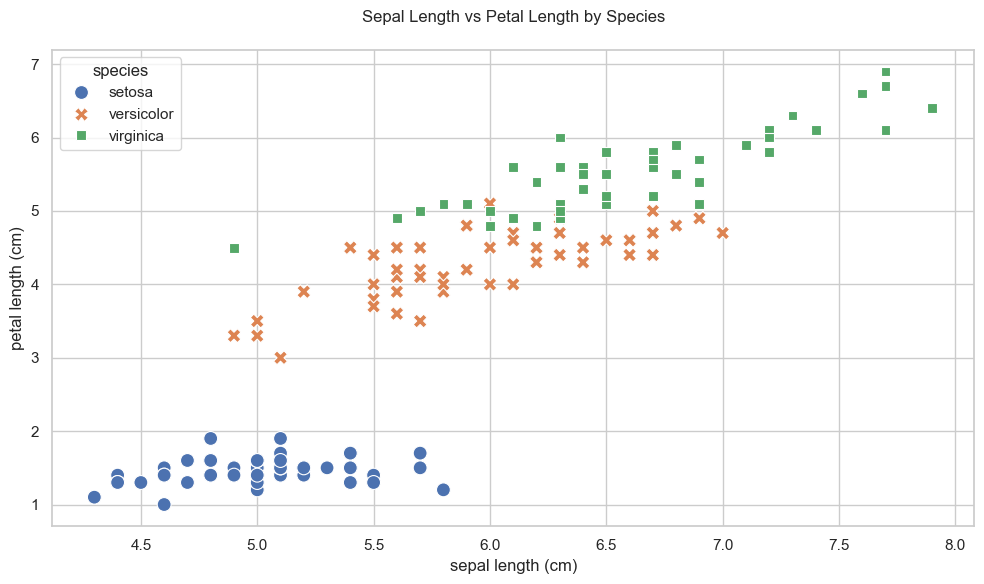


=== Key Findings ===
1. Data Quality: No missing values in the dataset
2. Species Distribution: {'setosa': 50, 'versicolor': 50, 'virginica': 50}
3. Correlations between features:


ValueError: could not convert string to float: 'setosa'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

# Set default plotting style
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
sns.set_theme(style='whitegrid')

# Error handling for data loading
try:
    # Load the Iris dataset
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

# Task 1: Data Exploration with findings
print("=== Data Exploration ===")
print("\nFirst few rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

# Check for missing values and handle them
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

if missing_values.any():
    df = df.fillna(df.mean())  # Fill numerical missing values with mean
    print("\nMissing values have been filled with mean values")

# Task 2: Basic Data Analysis with findings
print("\n=== Basic Data Analysis ===")
print("\nStatistical Summary:")
stats = df.describe()
print(stats)

# Group analysis
grouped_means = df.groupby('species').mean()
print("\nMean values by species:")
print(grouped_means)

# Task 3: Data Visualization
try:
    # 1. Line Chart
    plt.figure()
    for feature in iris.feature_names:
        plt.plot(df[feature][:50], label=feature, linewidth=2)
    plt.title('Feature Measurements for First 50 Samples', pad=20)
    plt.xlabel('Sample Index')
    plt.ylabel('Measurement (cm)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 2. Bar Chart
    plt.figure()
    ax = grouped_means['petal length (cm)'].plot(kind='bar', color='skyblue')
    plt.title('Average Petal Length by Species', pad=20)
    plt.xlabel('Species')
    plt.ylabel('Length (cm)')
    plt.xticks(rotation=45)
    for i, v in enumerate(grouped_means['petal length (cm)']):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # 3. Histogram
    plt.figure()
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    for i, species in enumerate(df['species'].unique()):
        plt.hist(df[df['species']==species]['sepal width (cm)'], 
                alpha=0.6, label=species, bins=15, color=colors[i])
    plt.title('Distribution of Sepal Width by Species', pad=20)
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 4. Scatter Plot with enhanced visualization
    plt.figure()
    sns.scatterplot(data=df, 
                    x='sepal length (cm)', 
                    y='petal length (cm)',
                    hue='species',
                    style='species',
                    s=100)
    plt.title('Sepal Length vs Petal Length by Species', pad=20)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f'Error in visualization: {e}')

# Add findings and observations
print("\n=== Key Findings ===")
print("1. Data Quality: No missing values in the dataset")
print("2. Species Distribution:", df['species'].value_counts().to_dict())
print("3. Correlations between numerical features:")
# Calculate correlations only for numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_cols].corr().round(2)
print(correlation_matrix)

## Findings Summary

1. Data Quality:
   - Dataset contains 150 samples with no missing values
   - 4 numerical features and 1 categorical target variable

2. Species Distribution:
   - Equal distribution of 50 samples per species

3. Key Relationships:
   - Strong correlation between petal length and petal width
   - Moderate correlation between sepal length and petal features
   - Sepal width shows weak correlations with other features